<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [50]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1: Become familiar with the dataset

In [112]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_Group,intercept
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years,1
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older,1
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older,1
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older,1


In [9]:
boston_df = boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']]

In [10]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [12]:
# Check for NaN values in the entire DataFrame
nan_values = boston_df.isna().sum().sum() 
nan_values

0

So the boston_df dataset is sap

### Task 2: Generate Descriptive Statistics and Visualizations

#### Box plot  "Median value of owner-occupied homes"

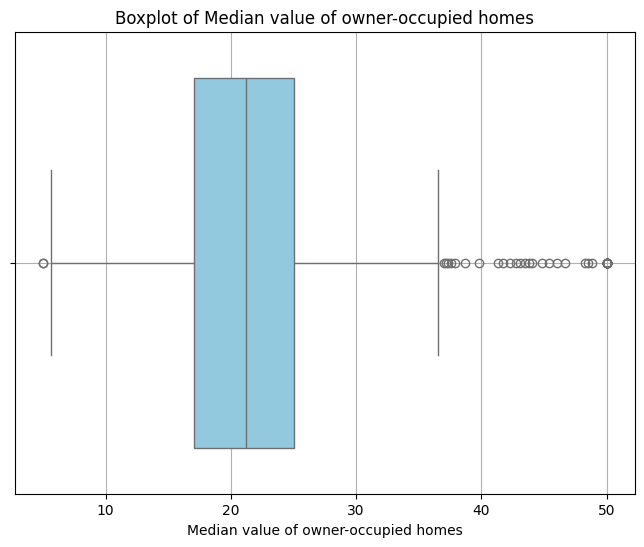

In [111]:
pyplot.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'], color='skyblue')
pyplot.title('Boxplot of Median value of owner-occupied homes')
pyplot.xlabel('Median value of owner-occupied homes')
pyplot.grid(True)

#### bar plot for the Charles river variable

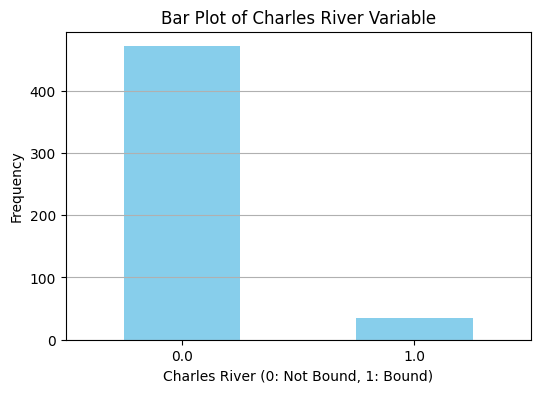

In [110]:
pyplot.figure(figsize=(6, 4))
boston_df['CHAS'].value_counts().plot(kind='bar', color='skyblue')
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('Charles River (0: Not Bound, 1: Bound)')
pyplot.ylabel('Frequency')
pyplot.xticks(rotation=0)
pyplot.grid(axis='y')

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [38]:
# Discretize the 'AGE' variable into three groups
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], 
                                labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])


Text(0, 0.5, 'MEDV')

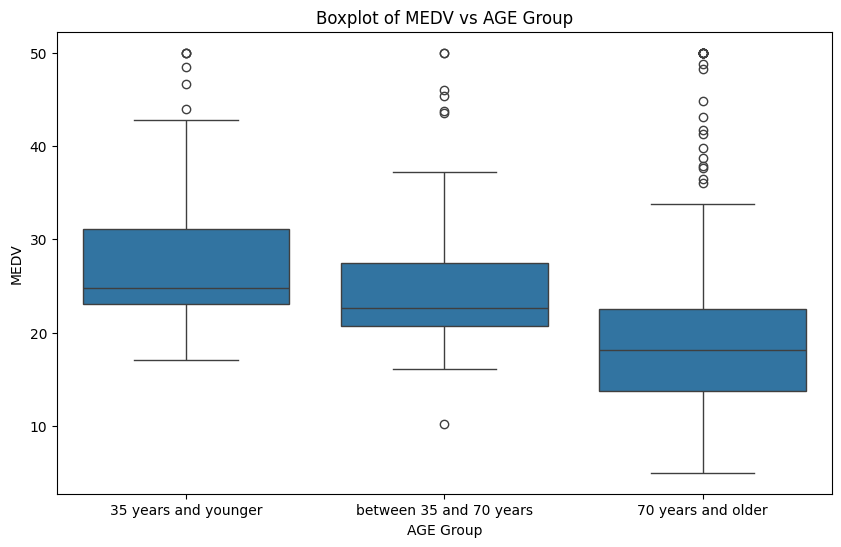

In [109]:
# Create the boxplot using Seaborn
pyplot.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
pyplot.title('Boxplot of MEDV vs AGE Group')
pyplot.xlabel('AGE Group')
pyplot.ylabel('MEDV')

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 

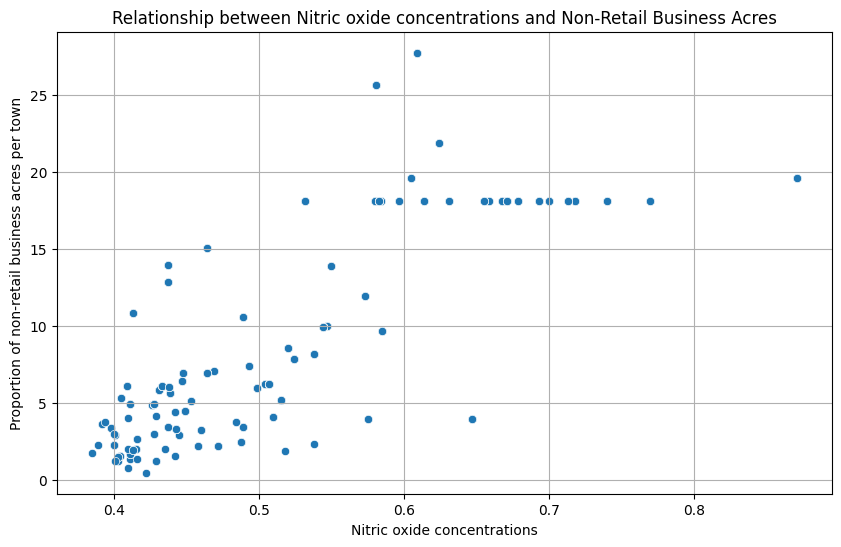

In [108]:
# Scatter plot using Seaborn
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('Relationship between Nitric oxide concentrations and Non-Retail Business Acres')
pyplot.xlabel('Nitric oxide concentrations')
pyplot.ylabel('Proportion of non-retail business acres per town')
pyplot.grid(True)

#### What can you say about the relationship?

The points in the scatter plot appear to follow a linear positive trend, it suggests that there is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

#### Create a histogram for the pupil to teacher ratio variable

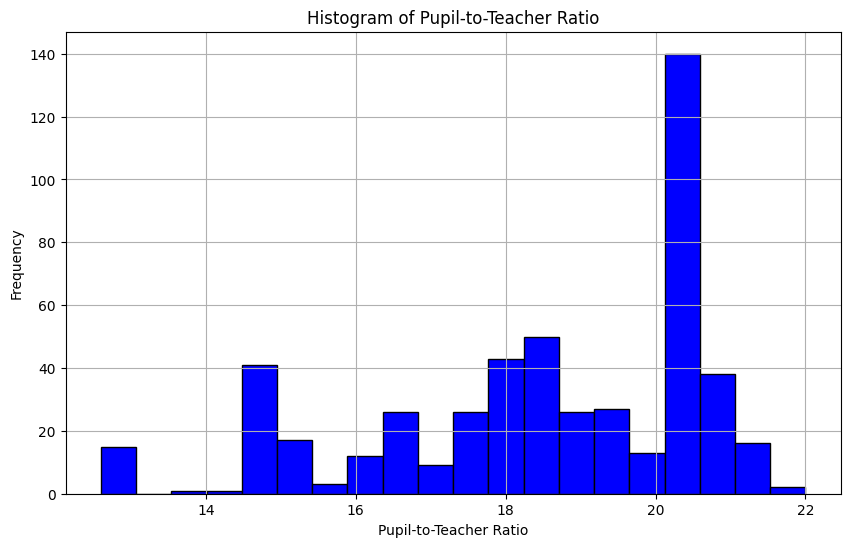

In [113]:
# Histogram using Matplotlib
pyplot.figure(figsize=(10, 6))
pyplot.hist(boston_df['PTRATIO'], bins=20, color='blue', edgecolor='black')
pyplot.title('Histogram of Pupil-to-Teacher Ratio')
pyplot.xlabel('Pupil-to-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.grid(True)

### Task 3: Use the appropriate tests to answer the questions provided.

#### 1-T-test for independent samples

In [97]:
def t_test(pvalue, t_statistic, alpha=0.05):
    print("T-tatistic:", t_statistic)
    print("P-value:", pvalue)
    if pvalue < alpha:
        print("Reject the null hypothesis. There is a significant difference in median values.")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference in median values.")


In [98]:
# Split the data into two groups based on the Charles river variable
group1 = boston_df[boston_df['CHAS'] == 0]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

#### Conclusion

In [99]:
t_test(p_value, t_statistic)

T-tatistic: -3.996437466090509
P-value: 7.390623170519905e-05
Reject the null hypothesis. There is a significant difference in median values.


#### 2-ANOVA

In [102]:
def ANOVA_test(pvalue, statistic, alpha=0.05):
    print("F-statistic:", statistic)
    print("P-value:", result.pvalue)
    if pvalue < alpha:
        print("Reject the null hypothesis. There is a difference in median values.")
    else:
        print("Fail to reject the null hypothesis. There is no difference in median values.")


In [89]:
result = stats.f_oneway(boston_df[boston_df['AGE'] < 35]['MEDV'],
                         boston_df[(boston_df['AGE'] >= 35) & (boston_df['AGE'] <= 70)]['MEDV'], boston_df[boston_df['AGE'] > 70]['MEDV'])


F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Reject the null hypothesis. There is a difference in median values.


#### Conclusion

In [103]:
ANOVA_test(result.pvalue, result.statistic)

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Reject the null hypothesis. There is a difference in median values.


### 3-Pearson Correlation

In [104]:
def Pearson_test(pvalue, statistic, alpha=0.05):
    print("Pearson correlation coefficient:", statistic)
    print("P-value:", pvalue)
    if p_value < alpha:
        print("Reject the null hypothesis. There is a relationship between the variables.")
    else:
        print("Fail to reject the null hypothesis. There is no relationship between the variables.")

In [106]:
# Calculate Pearson correlation coefficient and p-value
corr_coeff, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

Pearson correlation coefficient: 0.7636514469209151
P-value: 7.913361061239527e-98
Reject the null hypothesis. There is a relationship between the variables.


#### Conclusion

In [107]:
Pearson_test(p_value, corr_coeff) 

Pearson correlation coefficient: 0.7636514469209151
P-value: 7.913361061239527e-98
Reject the null hypothesis. There is a relationship between the variables.


### 4-Regression Analysis

In [57]:
# Add a constant term for the intercept
boston_df['intercept'] = 1

# Define independent variable (X) and dependent variable (y)
X = boston_df['DIS']
y = boston_df['MEDV']

# Create and fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Fri, 05 Apr 2024   Prob (F-statistic):                   1.52e-146
Time:                        07:20:12   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Conclusion

The coefficient associated with 'DIS' variable in the regression summary is positive (4.7985). Then an increase in the weighted distance leads to an increase in the median home value. Additionally, the p-value ( 0.000) associated with the coefficient indicates us the significance of this relationship.